In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris,load_breast_cancer
from scipy.optimize import fmin_tnc
from sklearn.datasets import make_moons, make_circles, make_classification
plt.rcParams["figure.figsize"] = (15,9)

# 4. Logistic Regression

## 4.1 Odds and Logits
- **Probability/Chance:**  of an event is a value between 0-1 indicating how likely it will happen.
- **Odds:** a ratio between the probabilities the event happens/doesn't happen. 
- **Examples:**
    - Everything starts with the concept of probability.  Let’s say that the probability of success of some event is .8.  Then the probability of failure is 1 – .8 = .2.  The odds of success are defined as the ratio of the probability of success over the probability of failure.  In our example, the odds of success are .8/.2 = 4.  That is to say that the odds of success are  4 to 1.  If the probability of success is .5, i.e., 50-50 percent chance, then the odds of success is 1 to 1.

    - The transformation from probability to odds is a monotonic transformation, meaning the odds increase as the probability increases or vice versa.  Probability ranges from 0 and 1.  Odds range from 0 and positive infinity.  Below is a table of the transformation from probability to odds and we have also plotted for the range of p less than or equal to .9.



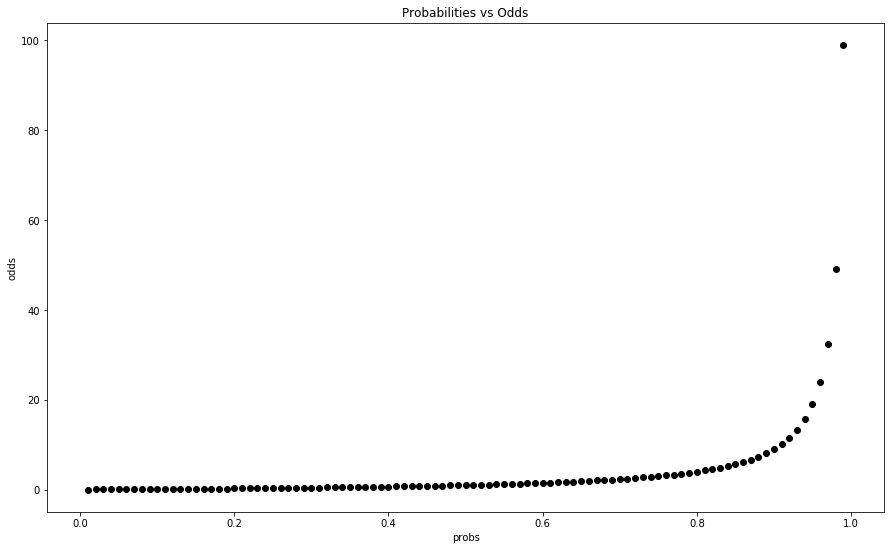

In [25]:
probs = np.arange(0.01,1,0.01)
probs_to_odds = lambda x: x/(1-x)
odds = probs_to_odds(probs)
plt.scatter(probs, odds, c = 'black')
plt.title("Probabilities vs Odds")
plt.xlabel("probs")
plt.ylabel("odds")
plt.show()

- **Logit**: is defined as the natural logarithmic of the odds, or in terms of probabilities
$$\text{logit}(p) = \log\left(\frac{p}{1-p}\right) \text{ for $0<p<1$}$$
The range is negative infinity to positive infinity. In regression it is easiest to model unbounded outcomes. Logistic regression is in reality an ordinary regression using the logit as the response variable. The logit transformation allows for a linear relationship between the response variable and the coefficients:
$$\text{logit}(p) = \beta_0 + \beta_1 x $$



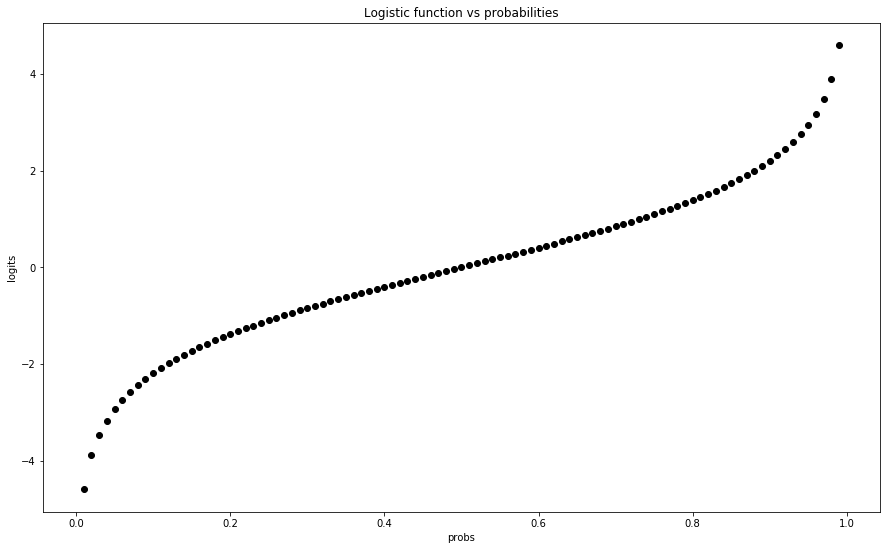

In [24]:
logistic_function = lambda x: np.log(x)
logits = logistic_function(odds)
plt.scatter(probs, logits, c = 'black')
plt.title("Logistic function vs probabilities")
plt.xlabel("probs")
plt.ylabel("logits")
plt.show()

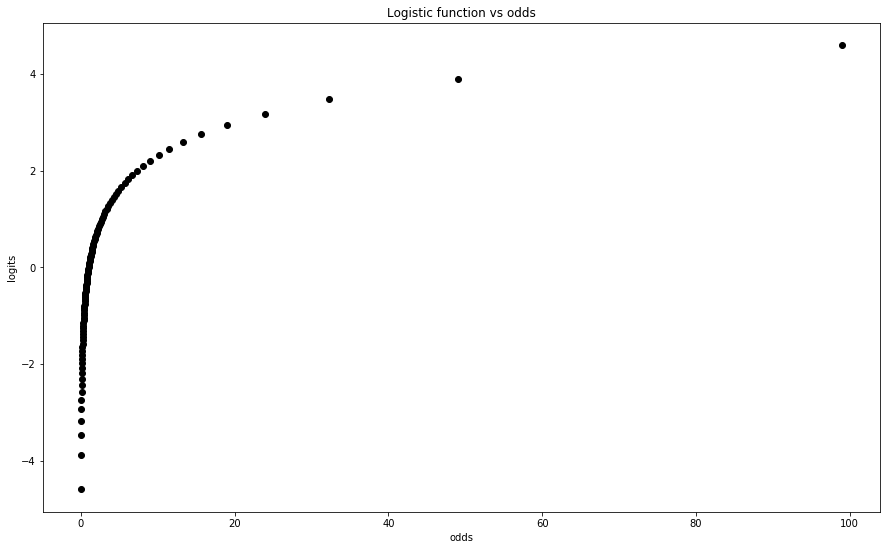

In [23]:
log_transform = lambda x: np.log(x)
logits = log_transform(odds)
plt.scatter(odds, logits , c = 'black')
plt.title("Logistic function vs odds")
plt.xlabel("odds")
plt.ylabel("logits")

plt.show()

## 4.2 Logistic function
- **Sigmoid function:** let's start with the class of sigmoidal function, we will meet again with it. A sigmoid function is a **bounded, differentiable, real** function that has a non negative derivative for each point and exactly one inflection point. The sigmoid function is constrained 1 and 0 as $x \rightarrow \pm \infty$.
- **Logistic function:** a common example of sigmoidal function which is defined as the formula

$$\sigma(t) = \frac{1}{1+e^{-t}} = \frac{e^t}{1+e^t}$$

## 4.3 Logistic Regression

- **Why** do we take all the trouble doing the transformation from probability to log odds?  One reason is that it is usually difficult to model a variable which has restricted range, such as probability.  This transformation is an attempt to get around the restricted range problem.  It maps probability ranging between 0 and 1 to log odds ranging from negative infinity to positive infinity.  Another reason is that among all of the infinitely many choices of transformation, the log of odds is one of the easiest to understand and interpret.  This transformation is called logit transformation.  The other common choice is the probit transformation, which will not be covered here.
- A logistic regression model allows us to establish a relationship between a **binary** outcome variable and a group of predictor variables.  It models the logit-transformed probability as a linear relationship with the predictor variables.  More formally, let $Y$  be the binary outcome variable indicating failure/success with  $\{0,1\}$ and $p$  be the probability of $Y$ to be 1, $p=P(Y=1|X=x)$. Let $\{x_1,x_2,...,x_k\}$ be a set of $k$ predictor variables. Then the logistic regression of on estimates parameter values for via maximum likelihood method of the following equation
$$\begin{align}
\text{logit}(p) &= \log(\frac{p}{1-p}) = \beta_0 + \beta_1 x_1 + ... +\beta_k x_k \\
\frac{p}{1-p} &= e^{\beta_0+\sum_{i=1}^k \beta_ix_i} \\
\frac{1}{p}-1 &= \frac{1}{e^{\beta_0+\sum_{i=1}^k \beta_ix_i}} \\
p &= \frac{e^{\beta_0+\sum_{i=1}^k \beta_ix_i}}{1+e^{\beta_0+\sum_{i=1}^k \beta_ix_i}} \\
p &= \sigma(\beta_0+\sum_{i=1}^k \beta_ix_i)
\end{align}$$ 
## 4.4 Finding the solutions
- Logistic regression models are usually fit by maximum likelihood, using the conditional likelihood of $Y$ given $X = \{x_1,...,x_k\}$. The log-likelihood for N observations $\{x^i\}_{i=1}^N$ is defined with the parameter set $\theta = \{\beta_0,\beta_1,...,\beta_k\}$ as
$$\mathcal{L}(\theta) = \sum_{i=1}^N \left[y_i\log p(x^i,\theta)+(1-y_i)\log (1 - p(x^i,\theta))\right]$$
With $p(x,\theta)$ is defined given the equation we worked on above
$$p(x,\theta)= \frac{e^{\beta_0+\sum_{i=1}^k \beta_ix_i}}{1+e^{\beta_0+\sum_{i=1}^k \beta_ix_i}} $$
- We can reduce the log-likelihood function to be a better form:
$$\begin{align}
\mathcal{L}(\theta) &= \sum_{i=1}^N \left[y_i\log p(x^i,\theta)+(1-y_i)\log (1 - p(x^i,\theta))\right] \\
&= \sum_{i=1}^N y_i\left[\log \frac{p(x^i,\theta)}{1-p(x^i,\theta)}\right] + \log(1 - p(x^i,\theta)) \\
&= \sum_{i=1}^N y_i (\beta_0 + \beta_1 x^i_1 + ... +\beta_k x^i_k) - \log(1 + e^{\beta_0+\sum_{i=1}^k \beta_ix_i})
\end{align}$$
- Here, to maximize the likelihood, we set the derivative to zero
$$\begin{align}
\frac{\partial \mathcal{L}(\theta)}{\partial \theta} &= \sum_{i=1}^N x^i (y_i - p(x^i,\theta)
\end{align}$$
- Note that this is a system of $k+1$ equations (including $\beta_0$). From this stage, we can use gradient-based solver to find the solution (Gradient Descent, Newton-raphson, LBFGS, etc.)

## 4.5 Intepretations

- **Examples:** given The data set with 200 observations and the outcome variable used will be **hon**, indicating if a student is in an honors class or not.  So our $p = P(hon=1)$.  We will purposely ignore all the significance tests and focus on the meaning of the regression coefficients. After fitting the logistic regression, we have the following equation:

$$\log(p/(1-p)) = logit(p) = – 10  + .1*math$$

- Let fix a math score, we can use 50.  Then the conditional logit of being in an honors class when the math score is held at 50 is

$$logit(p(Y=1|X=50)) = – 10  + .1*50$$

- Let increase a point in math score and calculate the differences

$$logit(p(Y=1|X=51)) = – 10  + .1*51$$
$$logit(p(Y=1|X=51)) - logit(p(Y=1|X=50)) = 0.1$$

- We can say now that the coefficient for math is the difference in the log odds.  In other words, for a one-unit increase in the math score, the expected change in log odds is .1. Now, we can translate it to the changes in odds

$$\exp(logit(p(Y=1|X=51)) - logit(p(Y=1|X=50))) = \frac{odds(X=51)}{odds(X=50)} = 1.1051709180756477$$

- In layman's term, it increases the odds by a factor of .105

## 4.6 Mutlinomial logistic regression

In [2]:
class LR:
    
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def dot_product(theta, x):
        return np.dot(x, theta)

    def probability(self, theta, x):
        return self.sigmoid(self.dot_product(theta, x))

    def loss_function(self, theta, x, y):
        N = x.shape[0]
        total_cost = -(1 / N) * np.sum(
            y * np.log(self.probability(theta, x)) + (1 - y) * np.log(
                1 - self.probability(theta, x)))
        return total_cost

    def gradient(self, theta, x, y):
        N = x.shape[0]
        return (1 / N) * np.dot(x.T, self.sigmoid(self.dot_product(theta, x)) - y)

    def fit(self, x, y, theta):

        opt_weights = fmin_tnc(func=self.loss_function, x0=theta, fprime=self.gradient,
                               args=(x, y.flatten()))
        self.w_ = opt_weights[0]
        return self

    def predict(self, x):
        theta = self.w_[:, np.newaxis]
        return self.probability(theta, x)

    def accuracy(self, x, actual_classes, probab_threshold=0.5):
        predicted_classes = (self.predict(x) >= probab_threshold).astype(int)
        predicted_classes = predicted_classes.flatten()
        accuracy = np.mean(predicted_classes == actual_classes)
        return accuracy * 100

The accuracy of the model is 89.103690685413
The model parameters using Gradient descent


[19.83414017 -1.05632193 -0.21793335]


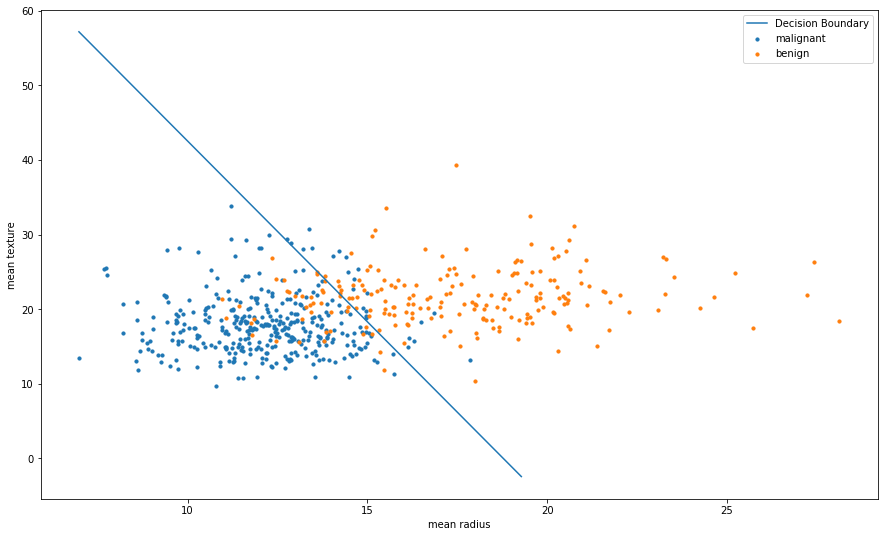

In [23]:
#Generate dataset
data,target = load_breast_cancer(return_X_y=True,as_frame=True)
data['y'] = target
df = data.copy()
X = df.values[:,:2]
y = df.values[:,-1]
X = X[:,:2]
X = np.c_[np.ones((X.shape[0], 1)), X]
theta = np.zeros((X.shape[1], 1))
model = LR()
model.fit(X, y, theta)
accuracy = model.accuracy(X, y.flatten())
parameters = model.w_
print("The accuracy of the model is {}".format(accuracy))
print("The model parameters using Gradient descent")
print("\n")
print(parameters)

# plotting the decision boundary
# As there are two features
# wo + w1x1 + w2x2 = 0
# x2 = - (wo + w1x1)/(w2)
malignant = df.loc[y== 1]

# filter out the applicants that din't get admission
benign = df.loc[y == 0]

# plots
plt.scatter(malignant.iloc[:, 0], malignant.iloc[:, 1], s=10, label='malignant')
plt.scatter(benign.iloc[:, 0], benign.iloc[:, 1], s=10,
            label='benign')

x_values = [np.min(X[:, 1] ), np.max(X[:, 2]-20)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.legend()
plt.show()

# Using scikit-learn

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X, y)
parameters = model.coef_
predicted_classes = model.predict(X)
accuracy = accuracy_score(y.flatten(),predicted_classes)
print('The accuracy score using scikit-learn is {}'.format(accuracy))
print("The model parameters using scikit learn")
print(parameters)

The accuracy score using scikit-learn is 0.8910369068541301
The model parameters using scikit learn
[[ 5.11799746e-05 -1.04625467e+00 -2.16885200e-01]]
